# Gaussian Discriminant Analysis From Scratch

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Defining the class for GDA

The implementation is pretty simple as we have to just directly plug in the different formulae involved in the GDA algorithm to directly get the ability to compute the probabilities based on the training data.

Unlike models of neural networks, or linear or logistic regression, here we need no optimization algrorithm like gradient descent to update any values at all. 

Hence the GDA algorithm is very simple and straightforward to implement if you know the formulae

In [3]:
class GaussianDiscriminantAnalysis:
    def __init__(self):
        self.mean_0 = None
        self.mean_1 = None
        self.cov_matrix = None
        self.prior_0 = None
        self.prior_1 = None

    def fit(self, X_train, y_train):
        # Separate the data into two classes based on the label
        X_0 = X_train[y_train == 0]
        X_1 = X_train[y_train == 1]

        # Calculate the prior probabilities
        self.prior_0 = len(X_0) / len(X_train)
        self.prior_1 = len(X_1) / len(X_train)

        # Calculate the mean and covariance matrix for each class
        self.mean_0 = np.mean(X_0, axis=0)
        self.mean_1 = np.mean(X_1, axis=0)

        self.cov_matrix = (np.cov(X_0.T) + np.cov(X_1.T)) / 2

    def predict(self, X):
        # Calculate the discriminant scores for each class
        g_0 = self.calculate_discriminant(X, self.mean_0, self.cov_matrix, self.prior_0)
        g_1 = self.calculate_discriminant(X, self.mean_1, self.cov_matrix, self.prior_1)

        # Predict the class with higher discriminant score
        y_pred = np.where(g_1 > g_0, 1, 0)
        return y_pred

    def calculate_discriminant(self, X, mean, cov_matrix, prior):
        # Calculate the Gaussian discriminant function for a given class

        # Compute the inverse of the covariance matrix
        cov_inv = np.linalg.inv(cov_matrix)

        # Compute the determinant of the covariance matrix
        det_cov = np.linalg.det(cov_matrix)

        # Compute the difference between the input features and the class mean
        diff = X - mean

        # Compute the exponent term of the Gaussian discriminant function
        quadratic_term = np.sum(diff * np.dot(diff, cov_inv), axis=1)
        exponent = -0.5 * quadratic_term
        
        # Combine the prior probability and the exponent to get the discriminant score
        discriminant = np.log(prior) + exponent - 0.5 * np.log(det_cov)

        return discriminant


Loading the datasets and separating into X and Y for tain and test

In [4]:
# Load the datasets
train_data = pd.read_csv('ds2_train.csv')
test_data = pd.read_csv('ds2_test.csv')

# Extract input features and labels
X_train = train_data[['x_1', 'x_2']].values
y_train = train_data['y'].values

X_test = test_data[['x_1', 'x_2']].values
y_test = test_data['y'].values

Instancing the GDA model and then training it (takes literally no time in training due to absence of any optimisation algorithms tahat run iteratively. all calculations occur in a single run)

In [5]:
# Instantiate the Gaussian Discriminant Analysis model
gda_model = GaussianDiscriminantAnalysis()

# Train the model on the training data
gda_model.fit(X_train, y_train)

In [6]:
# Predict the classes for training and test data
y_train_pred = gda_model.predict(X_train)
y_test_pred = gda_model.predict(X_test)

In [7]:
# Calculate accuracies
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred)

# Display the accuracies
print(f"Training Accuracy: {train_accuracy:.5f}")
print(f"Test Accuracy: {test_accuracy:.5f}")

Training Accuracy: 0.91375
Test Accuracy: 0.91000


91% on both the training and test sets

the accuracy is amazing compared to other models(like logistic regression). what sets GDA model apart is its simplicity in implementation. unlike other models that require iterative tuning of hyperparameters, the GDA model directly adapts to the data and performs optimally without the need for selecting an optimum set of values through  iterations. This straightforward approach makes it an efficient and effective choice for classification tasks.

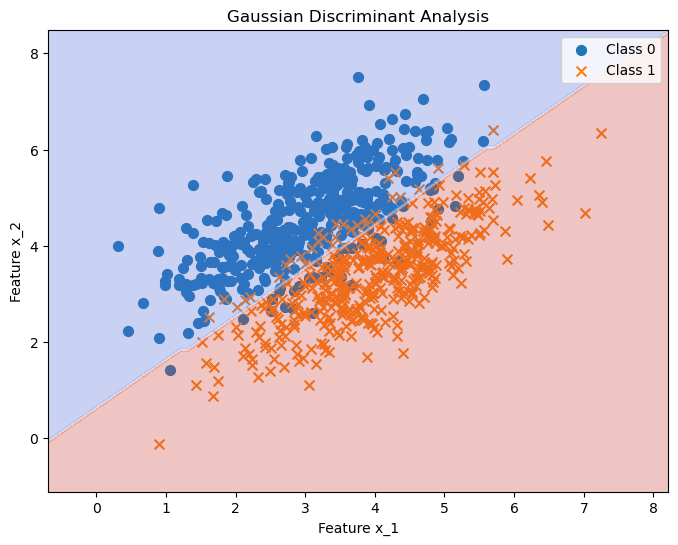

In [12]:
# Plot the training data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0', marker='o', s=50)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1', marker='x', s=50)

# Plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = gda_model.predict(np.c_[xx.ravel(), yy.ravel()])
# print("Z")
# print(Z.shape)
# print(Z)
# print("y_min and y_max")
# print(y_min,y_max)
# print("arange")
# print(np.arange(y_min,y_max,0.1))
# print("yy")
# print(yy.shape)
# print(yy)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Feature x_1')
plt.ylabel('Feature x_2')
plt.title('Gaussian Discriminant Analysis')
plt.legend()
plt.show()

# Thank you

---